In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

C:\Users\z\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_data = pd.read_csv('../input/zhengqi_train.txt', sep='\t', encoding='utf-8')
test_data = pd.read_csv('../input/zhengqi_test.txt', sep='\t', encoding='utf-8')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

In [5]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
V0,2888.0,0.123048,0.928031,-4.335,-0.29700,0.3590,0.72600,2.121
V1,2888.0,0.056068,0.941515,-5.122,-0.22625,0.2725,0.59900,1.918
V2,2888.0,0.289720,0.911236,-3.420,-0.31300,0.3860,0.91825,2.828
V3,2888.0,-0.067790,0.970298,-3.956,-0.65225,-0.0445,0.62400,2.457
V4,2888.0,0.012921,0.888377,-4.742,-0.38500,0.1100,0.55025,2.689
V5,2888.0,-0.558565,0.517957,-2.182,-0.85300,-0.4660,-0.15400,0.489
V6,2888.0,0.182892,0.918054,-4.576,-0.31000,0.3880,0.83125,1.895
V7,2888.0,0.116155,0.955116,-5.048,-0.29500,0.3440,0.78225,1.918
V8,2888.0,0.177856,0.895444,-4.692,-0.15900,0.3620,0.72600,2.245
V9,2888.0,-0.169452,0.953813,-12.891,-0.39000,0.0420,0.04200,1.335


In [6]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
V0,1925.0,-0.184404,1.073333,-4.814,-0.664,0.065,0.549,2.100
V1,1925.0,-0.083912,1.076670,-5.488,-0.451,0.195,0.589,2.120
V2,1925.0,-0.434762,0.969541,-4.283,-0.978,-0.267,0.278,1.946
V3,1925.0,0.101671,1.034925,-3.276,-0.644,0.220,0.793,2.603
V4,1925.0,-0.019172,1.147286,-4.921,-0.497,0.118,0.610,4.475
V5,1925.0,0.838049,0.963043,-1.168,0.122,0.437,1.928,3.176
V6,1925.0,-0.274092,1.054119,-5.649,-0.732,-0.082,0.457,1.528
V7,1925.0,-0.173971,1.040101,-5.625,-0.509,0.018,0.515,1.394
V8,1925.0,-0.266709,1.085916,-6.059,-0.775,-0.004,0.482,2.408
V9,1925.0,0.255114,1.014394,-6.784,-0.390,0.401,0.904,1.766


In [7]:
train_data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


In [8]:
test_data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


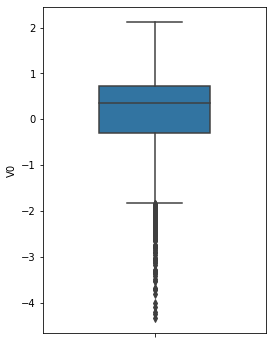

In [9]:
fig = plt.figure(figsize=(4, 6))
sns.boxplot(train_data['V0'], orient='v', width=0.5)

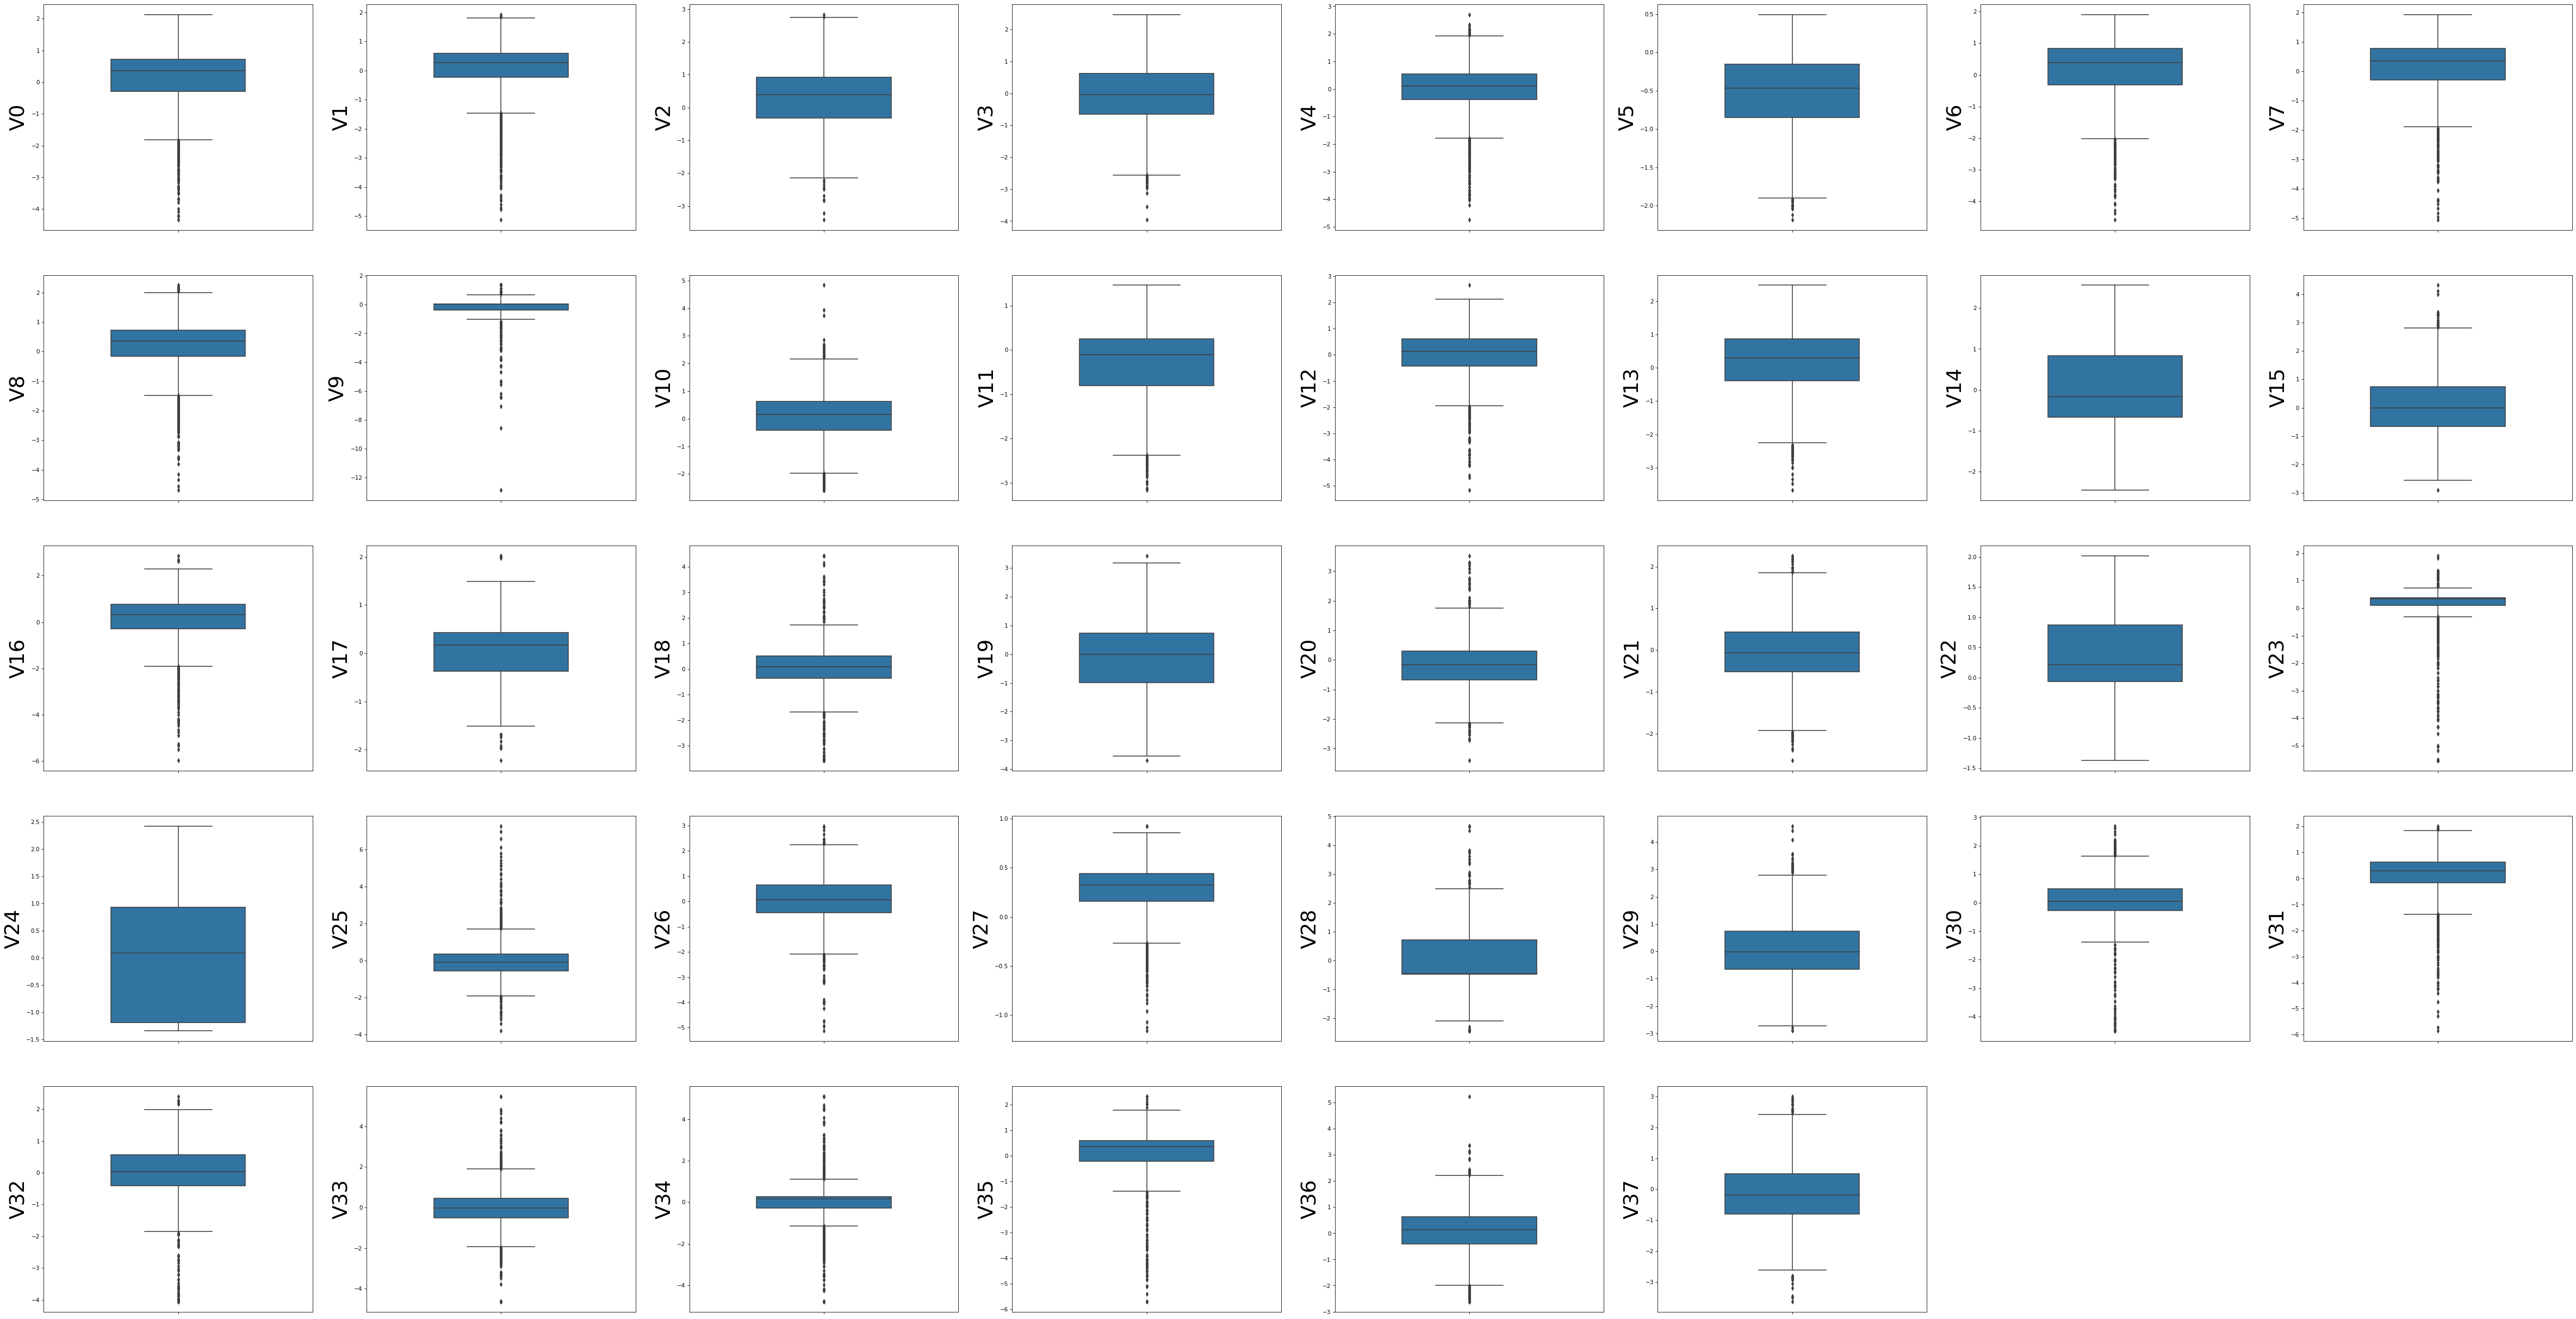

In [10]:
column = train_data.columns.tolist()[:39]
fig = plt.figure(figsize=(80, 60), dpi=75)
for i in range(38):
    plt.subplot(7, 8, i + 1)
    sns.boxplot(train_data[column[i]], orient='v', width=0.5)
    plt.ylabel(column[i], fontsize=36)
plt.show()

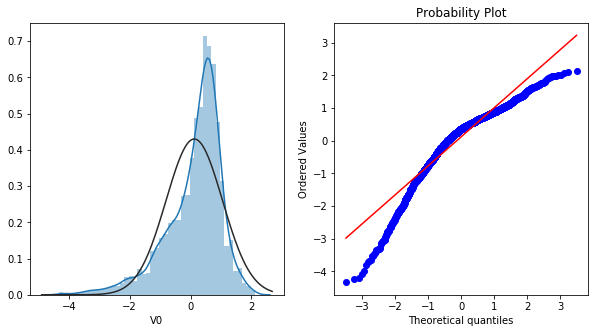

In [11]:
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
sns.distplot(train_data['V0'], fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(train_data['V0'], plot=plt)

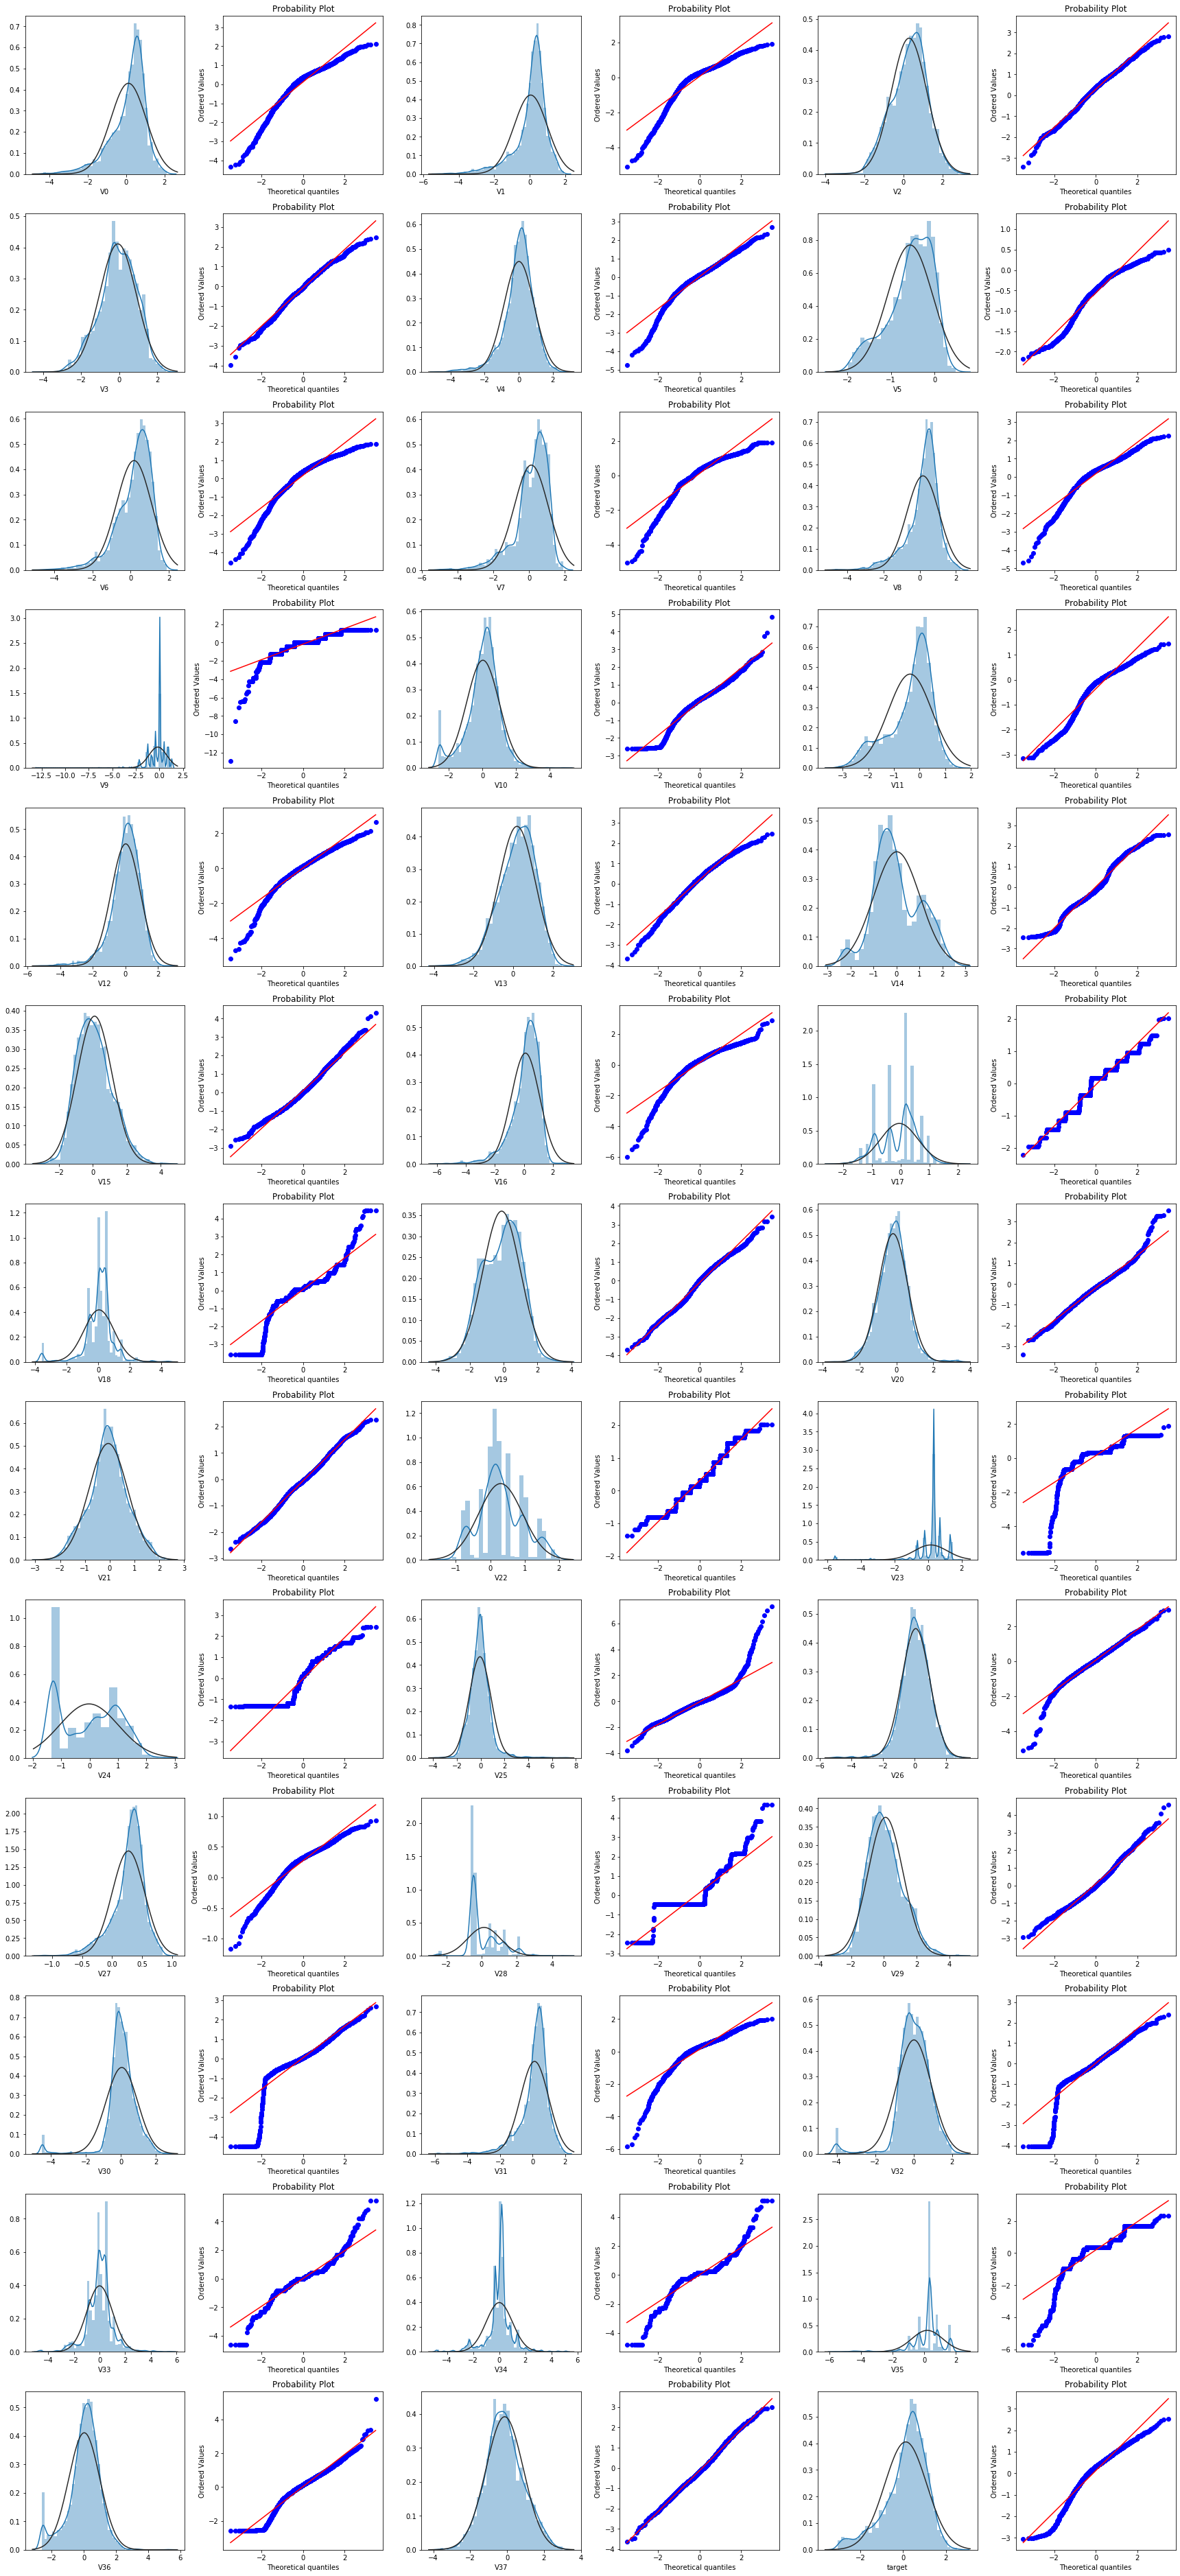

In [12]:
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(4 * train_cols, 4 * train_rows))

i = 0
for col in train_data.columns:
    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    sns.distplot(train_data[col], fit=stats.norm)
    
    i += 1
    sx = plt.subplot(train_rows, train_cols, i)
    res = stats.probplot(train_data[col], plot=plt)
plt.tight_layout()
plt.show()

### KDE分布图

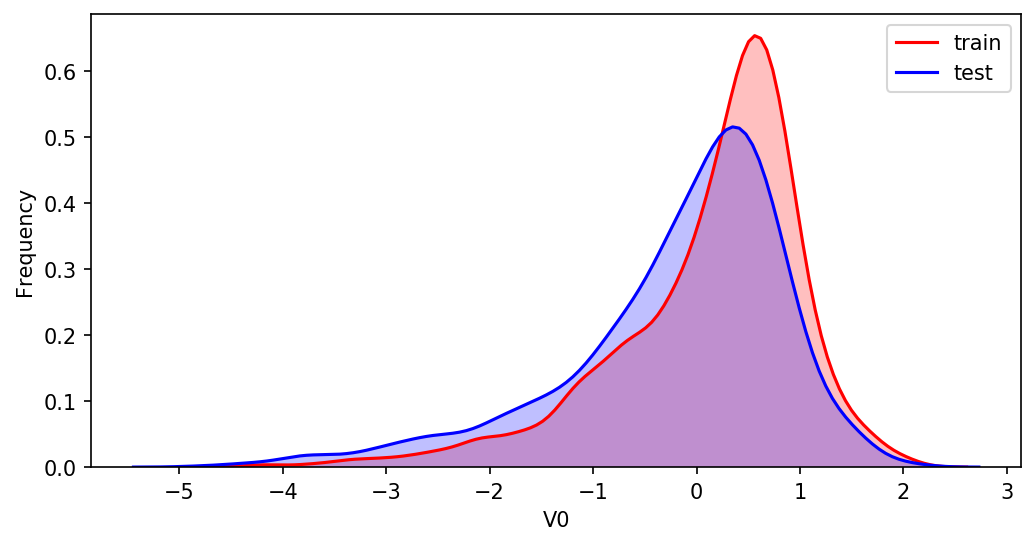

In [13]:
plt.figure(figsize=(8, 4), dpi=150)
ax = sns.kdeplot(train_data['V0'], color='Red', shade=True)
ax = sns.kdeplot(test_data['V0'], color='Blue', shade=True)
ax.set_xlabel('V0')
ax.set_ylabel('Frequency')
ax = ax.legend(['train', 'test'])

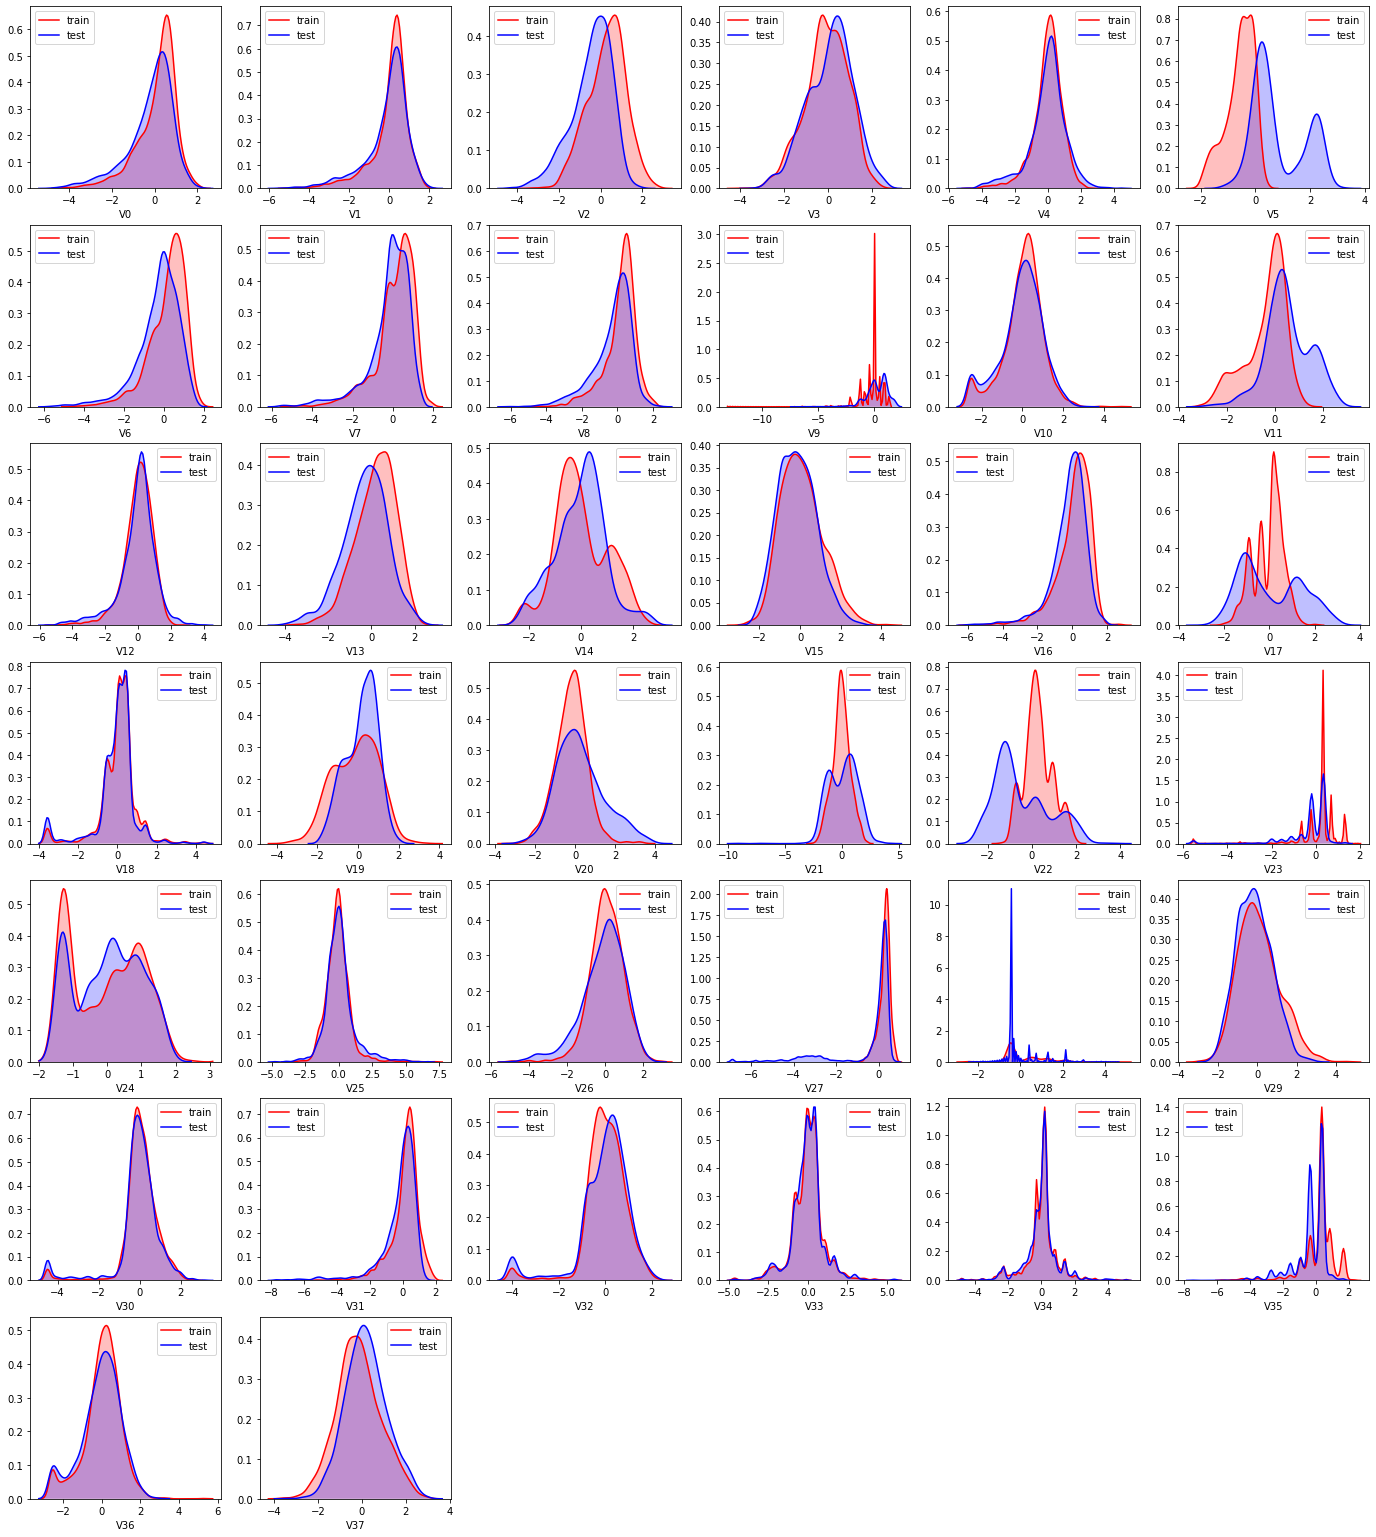

In [14]:
dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize=(4 * dist_cols, 4 * dist_rows))
i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train_data[col], color='Red', shade=True)
    ax = sns.kdeplot(test_data[col], color='Blue', shade=True)
    ax.set_xlabel(col)
    sx.set_ylabel('Frequency')
    ax = ax.legend(['train', 'test'])
    i += 1
plt.show()

### 线性回归关系图

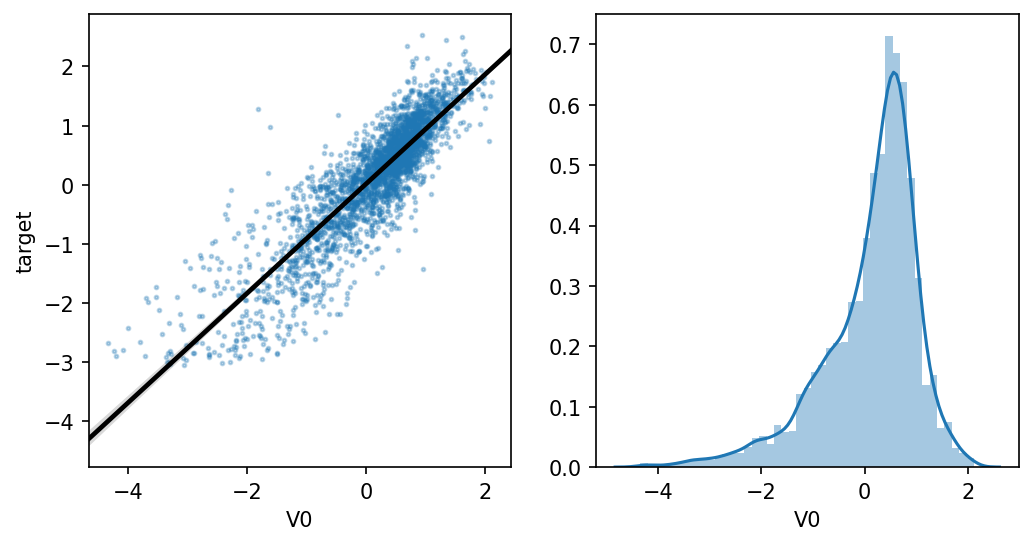

In [15]:
fcols = 2
frows = 1
plt.figure(figsize=(8, 4), dpi=150)

ax = plt.subplot(1, 2, 1)
sns.regplot(x='V0', y='target', data=train_data, ax=ax,
            scatter_kws={'marker': '.', 's': 3, 'alpha': 0.3},
            line_kws={'color': 'k'})
plt.xlabel('V0')
plt.ylabel('target')

ax = plt.subplot(1, 2, 2)
sns.distplot(train_data['V0'].dropna())
plt.xlabel('V0')

plt.show()

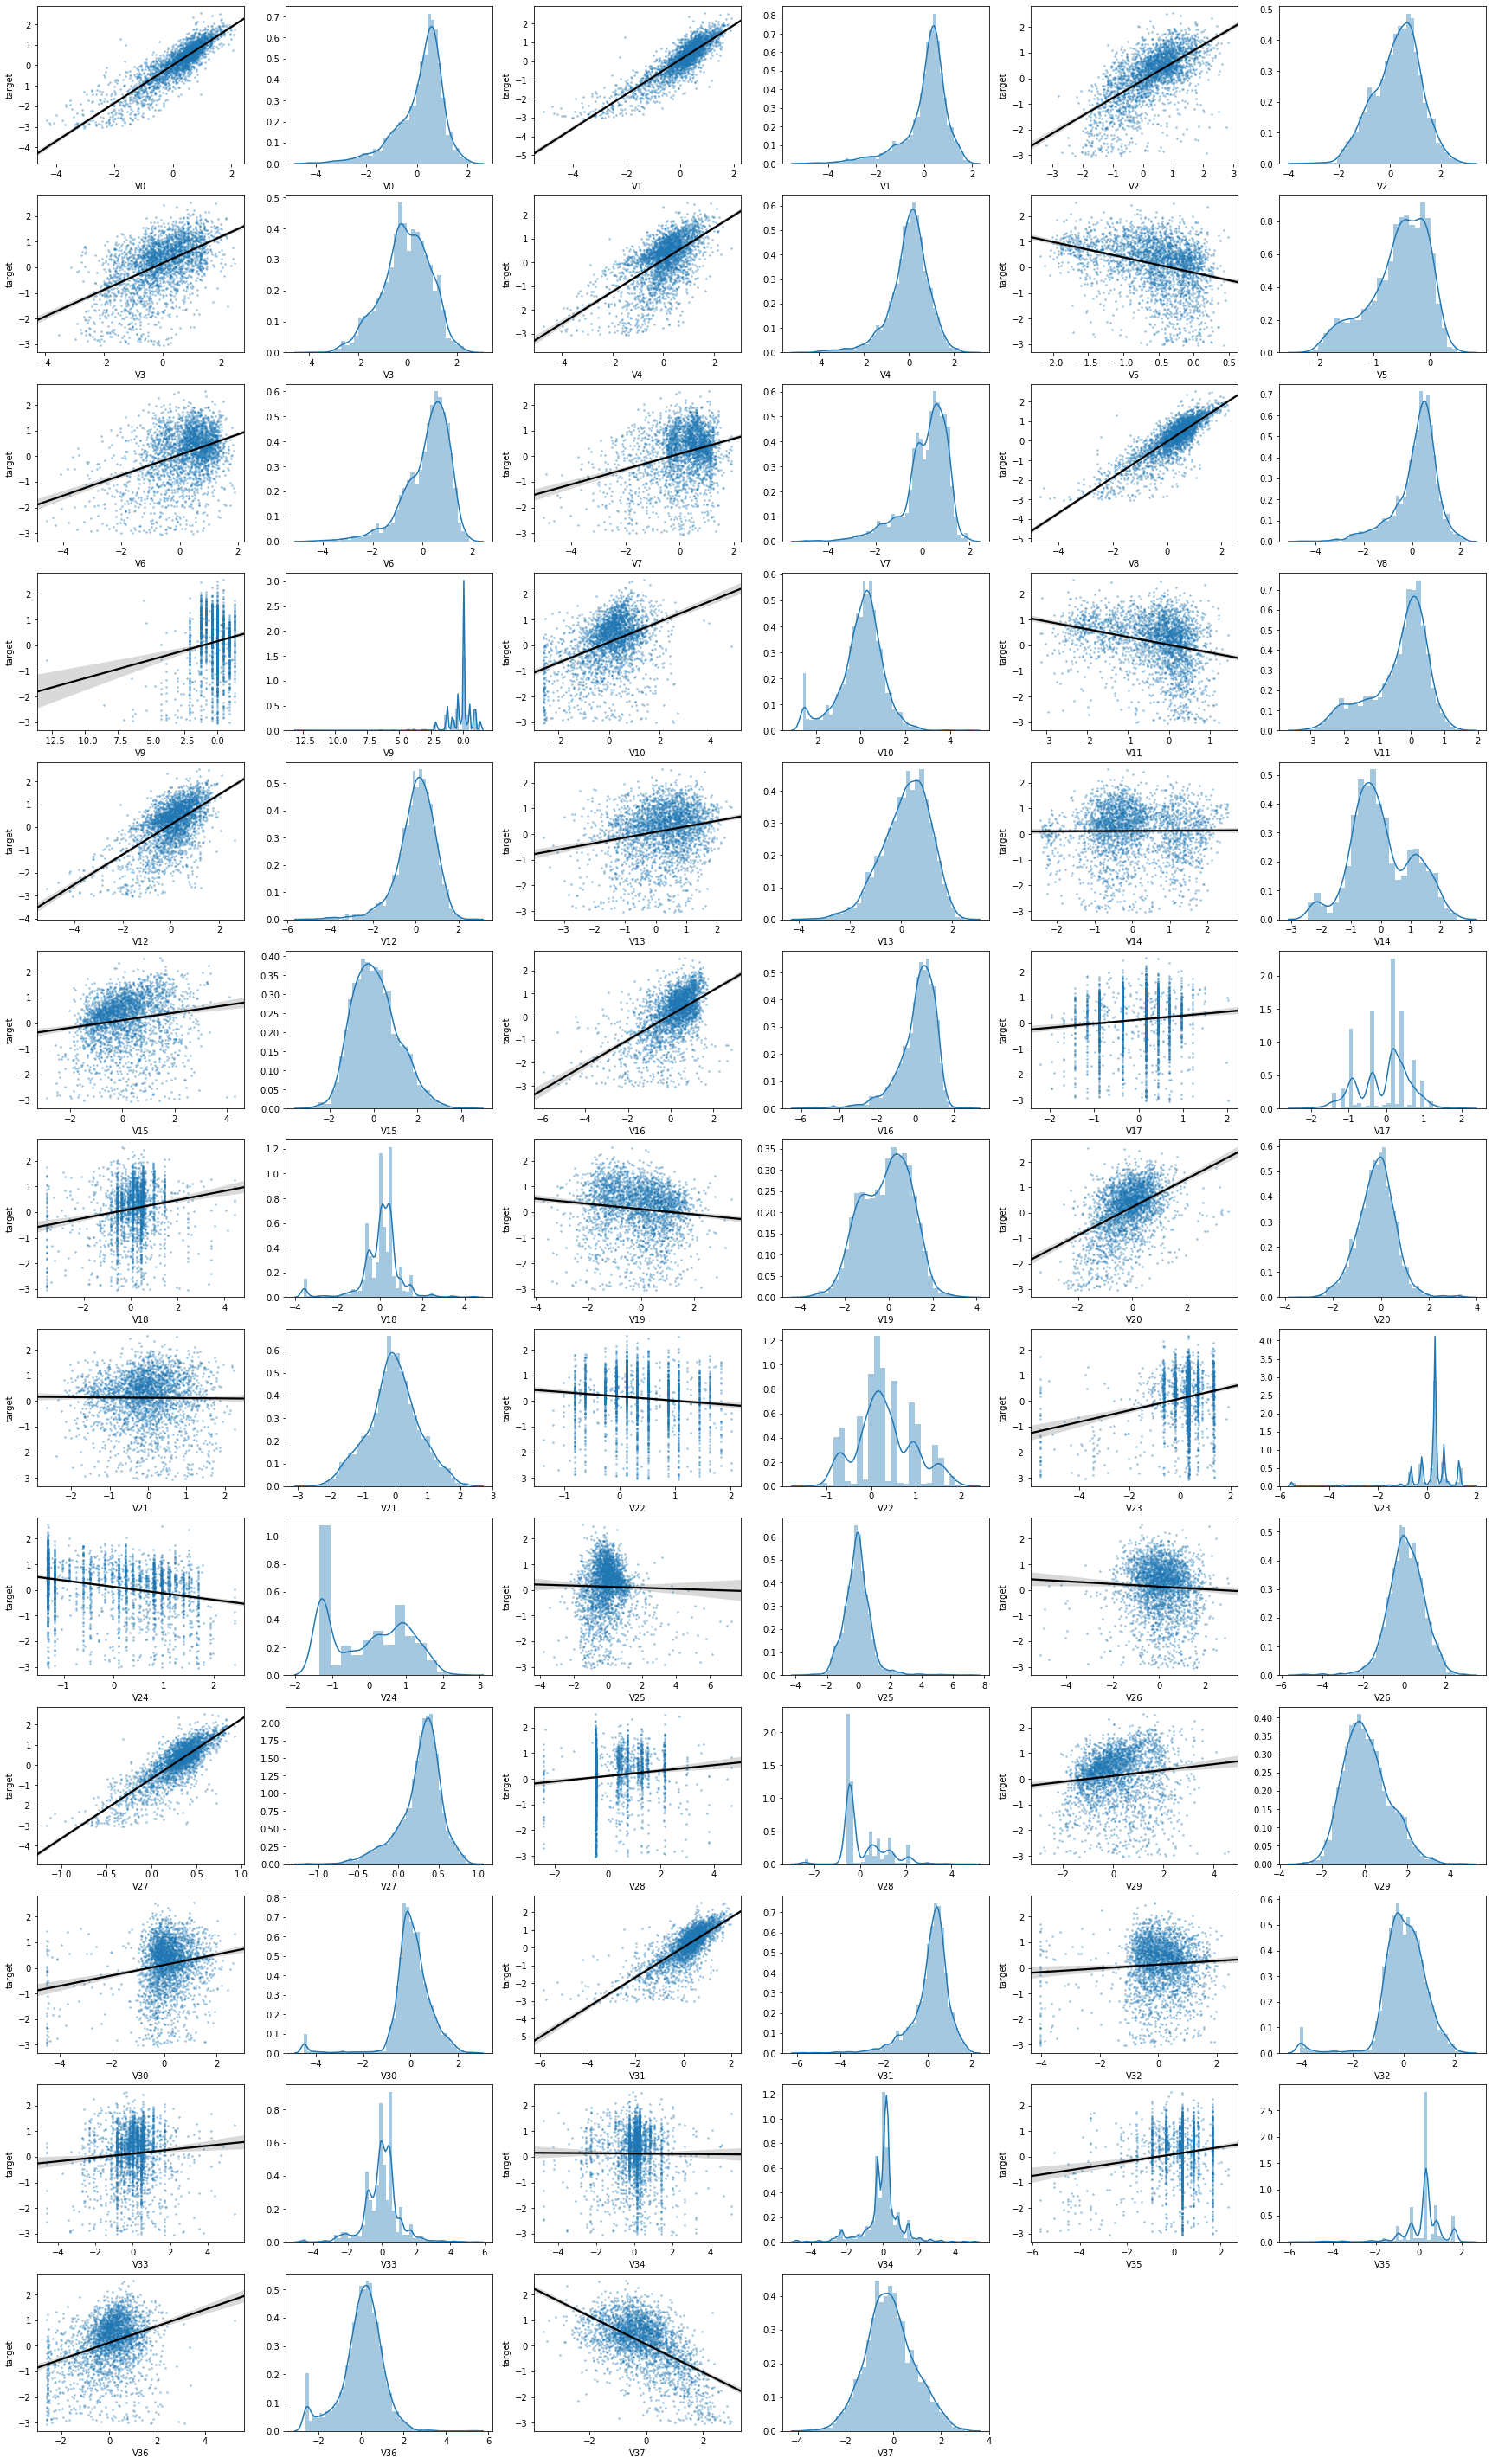

In [16]:
fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5 * fcols, 4 * frows))

i = 0
for col in test_data.columns:
    i += 1
    ax = plt.subplot(frows, fcols, i)
    sns.regplot(x=col, y='target', data=train_data, ax=ax,
                scatter_kws={'marker': '.', 's': 3, 'alpha': 0.3},
                line_kws={'color': 'k'})
    plt.xlabel(col)
    plt.ylabel('target')
    
    i += 1
    ax = plt.subplot(frows, fcols, i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

## 查看特征变量的相关性